## Intro to Python for Data Analysis

## Pandas Intro

What is Pandas? 
* Pandas is a Python library for data analysis.

Why use Pandas and the Python programming language?
* muliple IO sources
* can do much more than a traditional spreadsheet
* can do SQL type operations on data
* interop with other Python libraries (ie Numpy, general purpose libraries)
* rich ecosystem for analytics and scientific application


In [1]:
#import libraries
import numpy as np
import pandas as pd

Data Structures
* Series -  one-dimensional labeled array that can hold any datatype
* DataFrame

In [2]:
#the default is to assign numerical index
np.random.seed(72)
series1 = pd.Series(np.random.randn(10))
series1

0    0.318545
1   -0.679559
2   -2.208388
3    0.590240
4    1.674766
5   -1.665956
6   -0.824339
7    0.545260
8    0.001186
9   -0.757031
dtype: float64

In [3]:
#can also assign labels as index values
np.random.seed(72)
series1 = pd.Series(np.random.randn(10), index=['a', 'b', 'c', 'd', 'e','f','g','h','i','j'])
series1

a    0.318545
b   -0.679559
c   -2.208388
d    0.590240
e    1.674766
f   -1.665956
g   -0.824339
h    0.545260
i    0.001186
j   -0.757031
dtype: float64

In [4]:
#series can hold mixed types unlike a Numpy array
d = {'a' : 0., 'b' : 1., 'c' : 2.,'d': 'a'}
pd.Series(d)

a    0
b    1
c    2
d    a
dtype: object

In [5]:
#series attributes
series1.index, series1.values

(Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object'),
 array([  3.18545499e-01,  -6.79559435e-01,  -2.20838847e+00,
          5.90240163e-01,   1.67476604e+00,  -1.66595597e+00,
         -8.24338737e-01,   5.45260342e-01,   1.18619318e-03,
         -7.57030522e-01]))

In [13]:
#dataframes can be created from a Python dictionary of key value pairs
pd.DataFrame({'city' : ['Chicago', 'New York', 'London', 'Paris'],'number' : [4., 3., 2., 1.],'fruit' : ['pizza', 'bread', 'apples', 'oranges']})

,city,fruit,number
0,Chicago,pizza,4
1,New York,bread,3
2,London,apples,2
3,Paris,oranges,1


In [14]:
#or from series
d = {'one' : pd.Series([4, 5, 10,12], index=['a', 'b', 'c','d']),'two' : pd.Series([9, 3, 2, 6], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

,one,two
a,4,9
b,5,3
c,10,2
d,12,6


In practical application, your dataframes will come from IO operations on your data sources

Input/Output data ingestion
formats include
* csv
* excel
* json
* sql
* stata


In [15]:
?pd.Series

### Reading Data

In [16]:
dia = pd.read_csv("diamonds.csv")
dia.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31


### indexing,filtering, and subsetting

Usage of .iloc,.loc,.ix
* [] operator for slicing
* .loc is primarily label based
* .iloc is primarily integer position
* .ix supports mixed integer and label based access. It is primarily label based

In [17]:
#slices exclude the fourth position
dia[2:4]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63


In [18]:
#think of the indexes as labels so all rows specified will be returned
dia.loc[2:4]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


In [19]:
# 0-based indexing. When slicing, the start bounds is included, while the upper bound is excluded
dia.iloc[2:4]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63


In [20]:
dia.ix[2:4]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75


### Using groupby objects

* split apply combine
* similar to sql groupby operations
* create a groupby object

In [21]:
#this creates a groupby object. once we have this object, various operations can be performed
grouped = dia.groupby('clarity')
grouped.

In [22]:
len(grouped.groups)

8

In [23]:
grouped.mean()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


### Visualizations

/home/chief/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/chief/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


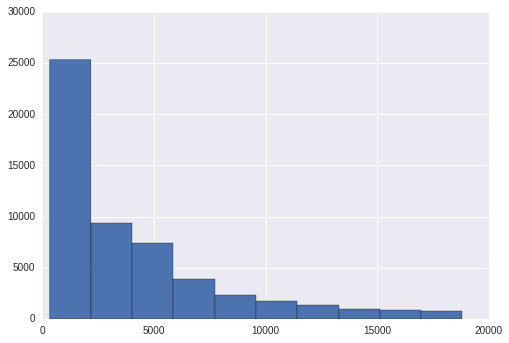

In [24]:
%matplotlib inline
import seaborn as sns
dia['price'].hist()

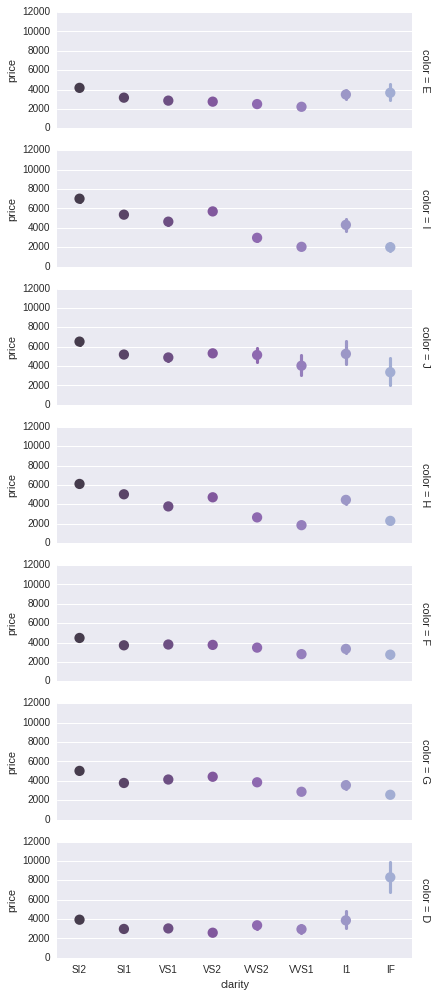

In [25]:
sns.factorplot("clarity","price", data=dia, row="color",
               margin_titles=True, aspect=3, size=2,palette="BuPu_d");

### Descriptive statistics

In [26]:
dia.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Exploratory data analysis

Exploratory data analysis

* cleaning
* munging
* transforming
* visualizing 
* subsetting


Get a feel for the data / Prep data for the pipeline

### Break out session protips

protip number one
* use tab completion to see methods available on your object

In [ ]:
pd.Series.

protip number two
* use ? to view docstrings and arguments

In [2]:
?pd.Series

### Resources for breakout sessions

* Pandas documentation at pandas.pydata.org
* Stack Overflow questions and answers
* Seaborn documentation for visualizations